In [6]:
import os
import requests
import pandas as pd
import numpy as np

In [4]:
def download_data(url):
    dir = 'data'
    path = 'co2.csv'
    dpath = os.path.join(dir , path)

    if(not os.path.exists(dir)):
        os.mkdir(dir)
    if not os.path.exists(dpath):
        r = requests.get(url)
        with open(dpath , 'wb') as f:
            f.write(r.content)
    else:
        print('Data couldn\'t be downloaded as the path already exists!')



<Axes: xlabel='Date'>

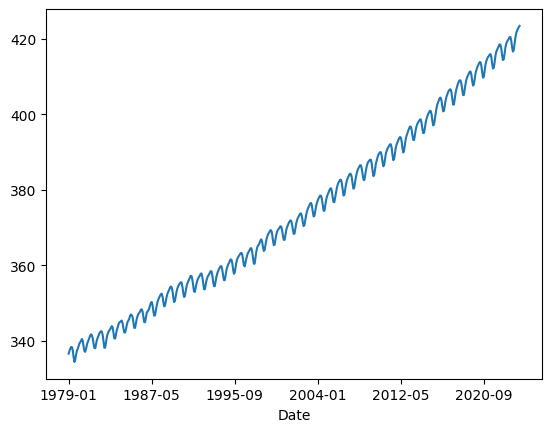

In [22]:
cdf = pd.read_csv('./data/co2.csv')
cdf = cdf.set_index('Date')
cdf['Average'].plot()

In [29]:
df = cdf[['Average']]
df.head()

,Average
Date,
1979-01,336.56
1979-02,337.29
1979-03,337.88
1979-04,338.32
1979-05,338.26


/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_86139/3297482517.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['adiff'] = df['Average'] - df['Average'].shift(1).fillna(method = 'bfill')
/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_86139/3297482517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adiff'] = df['Average'] - df['Average'].shift(1).fillna(method = 'bfill')


<Axes: xlabel='Date'>

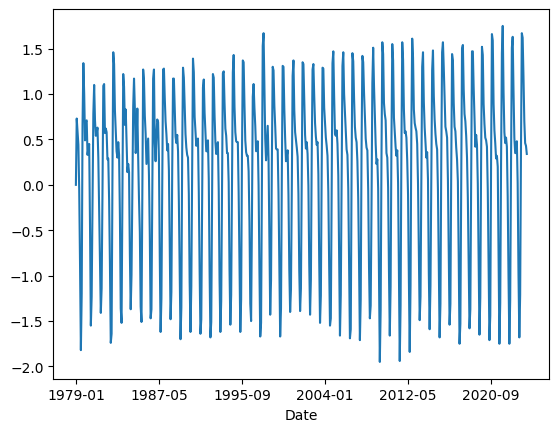

In [34]:
df['adiff'] = df['Average'] - df['Average'].shift(1).fillna(method = 'bfill')
df['adiff'].plot()

In [35]:
def gen_seq_data(data , n):
    x , y = [] , []
    for i in range(data.shape[0] - n):
        x.append(data[i:i+n-1])
        y.append(data[i+n-1 : i+n])
    x = np.array(x).reshape(-1, n - 1, 1)
    y = np.array(y)
    return x, y

In [36]:
x, y = gen_seq_data(df['adiff'], 12)
print(f'{x=} , {y=}')

x=array([[ 0.  ,  0.73,  0.59, ...,  0.66,  1.34,  1.  ],
       [ 0.73,  0.59,  0.44, ...,  1.34,  1.  ,  0.49],
       [ 0.59,  0.44, -0.06, ...,  1.  ,  0.49,  0.7 ],
       ...,
       [ 0.35,  0.35,  0.48, ...,  1.67,  1.62,  1.19],
       [ 0.35,  0.48,  0.02, ...,  1.62,  1.19,  0.7 ],
       [ 0.48,  0.02, -0.98, ...,  1.19,  0.7 ,  0.46]]) , y=array([[ 0.49],
       [ 0.7 ],
       [ 0.71],
       [ 0.33],
       [ 0.4 ],
       [ 0.45],
       [-0.45],
       [-1.55],
       [-1.23],
       [-0.16],
       [ 0.78],
       [ 1.1 ],
       [ 0.71],
       [ 0.54],
       [ 0.57],
       [ 0.63],
       [ 0.3 ],
       [-0.25],
       [-0.8 ],
       [-1.41],
       [-1.14],
       [-0.1 ],
       [ 1.09],
       [ 1.11],
       [ 0.57],
       [ 0.62],
       [ 0.58],
       [ 0.28],
       [ 0.29],
       [-0.16],
       [-0.87],
       [-1.74],
       [-1.64],
       [ 0.05],
       [ 1.46],
       [ 1.33],
       [ 0.82],
       [ 0.6 ],
       [ 0.37],
       [ 0.3 ],
     

In [46]:
from tensorflow.keras import layers, models
import tensorflow as tf
tf.keras.backend.clear_session()

In [47]:
rnn = models.Sequential([
    layers.SimpleRNN(64 , input_shape = (12,1)),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(1)
])
rnn.compile(loss = 'MSE' , optimizer = 'adam')
rnn.summary()

/Users/sanketmishra/Desktop/Desktop/college/PhD/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,449 (33.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
x, y = gen_seq_data(df['adiff'] , 13)
rnn.fit(x, y , shuffle = 'true' , batch_size = 64 , epochs = 25)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7323  
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0756 
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0477
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0284 
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0204 
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 
Epoch 13/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188
Epoch 14/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186
Epoch 15/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0175
Epoch 16/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

#Predicting co2 outputs:


In [55]:
history = df['adiff'].values[-12:].reshape(1,-1,1)
true_vals = []
ptrue = df['Average'].values[-1]
print((rnn.predict(history)).shape)
for i in range(60):
    pdiff = rnn.predict(history).reshape(1,-1,1)
    history = np.concatenate((history[:,1:,:] , pdiff), axis = 1)
    true_vals.append(ptrue+pdiff[0,0,0])
    ptrue = true_vals[-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7

In [59]:
print(f'{history=},{len(true_vals)=}')

history=array([[[-0.00194952],
        [-0.81378251],
        [-1.56850123],
        [-1.28345037],
        [ 0.09841521],
        [ 1.30930877],
        [ 1.36904728],
        [ 0.90334088],
        [ 0.63193554],
        [ 0.48273411],
        [ 0.42600536],
        [ 0.37560594]]]),len(true_vals)=60


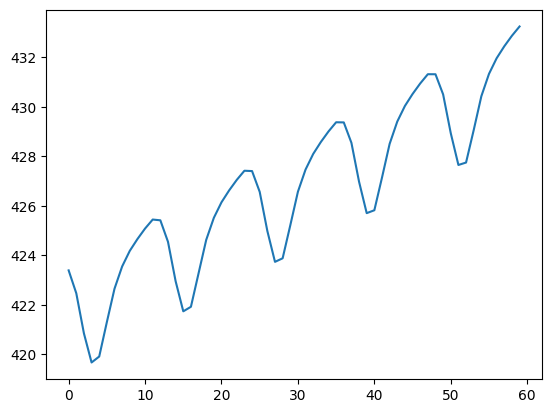

In [61]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,len(true_vals)) , true_vals)